# `머신러닝(기계학습) `

- 데이터를 구문 분석하고 해당 데이터를 통해 학습한 후 정보를 바탕으로 결정을 내리기 위해 학습한 내용을 적용하는 알고리즘


- 주어진 데이터로 기능을 수행하고, 시간이 지남에 따라 그 기능이 점차 향상됨. 


- `데이터를 학습시키고, 결과를 예측.`


- `지도학습`과 `비지도학습`으로 나뉨

----

### 1. 머신러닝의 분류
### 1) 지도 학습
---
* 답이 제공되어 나중에 답을 맞출 수 있게 하는 족보같은 개념.    
    
    * 지도학습은 결국 `답을 찾기 위해 활용하는 알고리즘`. 
        
    * 답이 있는 **`훈련 데이터 (Train Set)`** 를 이용해 학습시킴
        
    * 그 다음, 우리가 예측하고자 하는 데이터를 평가 데이터, **`테스트 데이터(Test Data)`** 라 하고, 얼마나 정확하게 답을 맞추었느냐에 따라 알고리즘의 성능을 결정.  
    


----

> ### 분류
>> #### 1. 범주형 데이터
>> 데이터의 값이 숫자가 아닌, A,B,C 등으로 구분되는 데이터. 

> ### 회귀
> `일반적인 관계 특성.` 
>> #### 2. 연속형 데이터 
>> 값들이 어느 범위 내에서 `수치형태`로 존재하는 데이터. 
    
 

### 2) 비지도 학습
---
* 답이 제공되지 않은 데이터를 학습시키는 것
    * 결국 최종 판단은 사람의 몫





*!! 어차피 우리는 지도학습만 배울겁니다!!*
---

----


### 2. 사이킷런 이용
---
#### <span style="color:blue"> 1.필요한 모듈들 import</span>

~~~python

    import numpy as np                                       ## 기초 수학 연산 및 행렬계산
    import pandas as pd                                      ## 데이터프레임 사용

    from sklearn.model_selection import train_test_split     ## train, test 데이터 분할

    from sklearn.linear_model import LinearRegression        ## 선형 회귀분석
    from sklearn.linear_model import LogisticRegression      ## 로지스틱 회귀분석
    from sklearn import svm                                  ## 서포트 벡터 머신
    from sklearn import tree                                 ## 의사결정나무
    from sklearn.ensemble import RandomForestClassifier      ## 랜덤포레스트

    import matplotlib.pyplot as plt                          ## plot 그릴때 사용
    
~~~



#### <span style="color:blue"> 2.데이터 전처리 </span>


- 텍스트든, 일반 수치형 데이터든 상관없습니다.
- 전처리 과정이 생각보다 몹시 중요합니다.
- 학습에 도움이 되는 외부 데이터를 첨가하거나, 데이터 일반화, Log Scaling 등을 수행합니다. 
- MinMax, Standard Scaler 등

#### <span style="color:blue">3. 독립변수/종속변수 나눈 후  학습 데이터와 평가 데이터로 구분.</span>



~~~python

X = Data[['col1','col2']] ## 독립 변수
y = Data['종속변수']        ## 종속 변수 


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

~~~

----

#### <span style="color:blue">4. 학습 후 성능 확인 </span>
#### 각 모델마다 여러 하이퍼파라미터가 존재. 최적화된 파라미터를 구하는 sklearn api 는 두 개 

1) `GridSearchCV`

~~~python
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
~~~

2) `RandomizedSearchCV`

~~~python

class sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)

~~~

---

~~~python

fit(x_train, y_train)     ## 모수 추정(estimate)
get_params()              ## 추정된 모수 확인
predict(x_test)           ## x_test로부터 라벨 예측
predict_log_proba(x_test) ## 로그 취한 확률 예측
predict_proba(x_test)     ## 각 라벨로 예측될 확률
score(x_test, y_test)     ## 모델 정확도 평가를 위한 mean accuracy


~~~

**Mean Accuarcy?**  

~~~python

#분류
sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

#회귀
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

~~~





    
- 이 함수는 모델의 성능을 평가하기 위해 mean accuracy를 제공. 얼마나 맞췄는지 알아보기 위함. 
- 여러 척도가 존재. 

### 가장 높은 성능을 갖춘 hyperparameter 을 선택. 이 과정을 <span style="color:red">hyper parameter tuning </span>이라고 함.   

####   ->   이것을 가장 좋은 성능을 가진 모델이 나올 때까지 반복. 

---

#### <span style="color:blue">6.우리가 최종 선택한 모델과 하이퍼파라미터로 예측하고자 하는 데이터 학습, 결과 얻기 </span>




---
### 3. 회귀분석

- `종속변수와 독립변수 사이의 관계를 가장 잘 설명해주는 하나의 직선`을 구하는 것
- y = b0 + b1x + b2x^2 + b3X^3.... 꼴
- x는 독립변수..
- 이러한 회귀식의 `모수`는 `최소제곱법`을 기준으로 만들어짐. 

#### 1. `Linear Regression`

- 수치형 데이터 => 예측의 문제에서 사용하는 단순선형회귀
- ex) 아파트 가격 예측 


In [1]:
cd

/Users/dagunoh


In [2]:
#다중선형회귀 실습 

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Desktop/21Work/datasets/streeteasy/manhattan.csv")
data

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [3]:
data.columns

#rent: 주택의 임대료
#그 외의 항목들은 침실이 몇 개 있는지, 엘레베이터가 있는지, 식기세척기가 있는지 등 주택에 대한 다양한 정보. 

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split

x = data[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = data[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

#선형회귀 모형에 학습

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [5]:
#예측값 
y_predict = mlr.predict(x_test)
y_predict[:10]

array([[ 4815.02754017],
       [ 3324.16722412],
       [ 3226.88188658],
       [ 5319.27506338],
       [13779.18088406],
       [ 5558.19418411],
       [ 6417.74720611],
       [ 4332.85707469],
       [ 1950.0301566 ],
       [ 3582.04194743]])

In [6]:
#이 선형회귀 모델의 성능

print(mlr.score(x_train, y_train))

0.7834128907373274


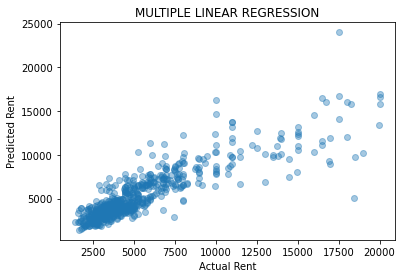

In [7]:
# 그래프로 그려보기 

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

---
#### 2. `Logistic Regression`

- 데이터가 **어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측**하고 
그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘

- 범주형 자료 => 분류 문제에서 사용하는 로지스틱회귀. 
- ex) A 라벨과 B 라벨 분류하기 



In [8]:
import pandas as pd
import numpy as np
 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

if __name__ == '__main__':
    breast_cancer = datasets.load_breast_cancer()
    print('종양 반응 :', breast_cancer.target_names)
    print('target : [malignant:악성, benign: 양성]')
    print('데이터 수 :', len(breast_cancer.data))
    print('데이터 열 이름 :', breast_cancer.feature_names)
    print('data 예시 : ', breast_cancer.data[0])

종양 반응 : ['malignant' 'benign']
target : [malignant:악성, benign: 양성]
데이터 수 : 569
데이터 열 이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
data 예시 :  [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [9]:
#데이터 정렬 

data2= pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
sy = pd.Series(breast_cancer.target, dtype='category')
data2['isCancer'] = sy

data2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,isCancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
#독립변수, 종속변수 구분
x = data2.loc[:, 'mean radius':'worst fractal dimension']
y = data2['isCancer']

#train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(426, 30) (143, 30)
(426,) (143,)


In [11]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

/Users/dagunoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#x_test 넣었을 때 결과가 어떻게 되는지. 
#이 친구가 y_test랑 비슷할 수록 성능이 좋은 것. 

y_pred = lg.predict(x_test)
print(y_pred)


[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [13]:
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.958041958041958


---
### 4. 의사결정나무 (Decision Tree), RandomForest

- 분류, 회귀 모두에게 쓰임

- 훈련 과정에 구성한 다수의 결정 트리를 이용해 분류하거나, 평균 예측치를 출력함으로써 동작

- 꽤 정확하고, 여러개의 입력 변수들을 다루는 것 가능. 

**왜 정확할까?**

종속변수가 30개라 치면, 30개의 가지를 만들어서 분류해야하기 때문에 너무 많은 가지가 만들어질 것 -> 오버피팅. 하지만 랜덤으로 몇개의 종속변수만 설정해서 하나의 결정트리를 만들고, 또 이런식으로 계속 전개하면서 예측값들 중 가장 많이 나온 값을 최종 예측값으로 정하는 것. 


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

data2 #위의 Logistic regression에서 사용한 데이터 그대로 사용. 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,isCancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
x = data2.loc[:, 'mean radius':'worst fractal dimension']
y = data2['isCancer']

#train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)



(426, 30) (143, 30)
(426,) (143,)


In [16]:
#하이퍼파라미터 튜닝

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 11, 12, 13, 14,15,16,17,18,19, 20],
           'max_depth' : [6, 8, 10, 12, 15, 18,],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

kf = KFold(n_splits=5)


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
print('cross_val_score: ', cross_val_score(rf_clf,x_train,y_train,cv=kf))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 14}
최고 예측 정확도: 0.9507
cross_val_score:  [0.94186047 0.95294118 0.91764706 0.94117647 0.97647059]


In [17]:
rf = RandomForestClassifier(max_depth= 6, min_samples_leaf =  8, min_samples_split =  20, n_estimators= 14)

rf.fit(x_train, y_train)
 
# 예측
y_pred = rf.predict(x_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.951048951048951


In [18]:
score = cross_val_score(rf_clf,x_test,y_test,cv=kf)
sum(score)/len(score)

0.9443349753694582

### 5. SVM (support vector machine) 

- 주어진 데이터가 어느 카테고리에 속할지 판단. 
- Margin 최대화 하는 방향으로 => 이상치의 영향을 많이 받지 않음. 
- 비선형 분류에서도 사용 가능. 

- **parameter** : **gamma** = Gamma가 크면 decision boundary는 더 굴곡지고, Gamma가 작으면 decision boundary는 직선에 가까움.

In [19]:
from sklearn.svm import SVC
data2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,isCancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [20]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svc = svm.predict(x_test)

# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred_svc))

정확도 : 0.9370629370629371


----
## `오늘의 실습`
### [IDMB 영화 리뷰 감성분석]



In [21]:
cd

/Users/dagunoh


In [22]:
import pandas as pd

data3 = pd.read_csv('Desktop/Git/2021_Work/2021/text_analysis/labeledTrainData.tsv', header=0, sep='\t', quoting=3)
data3.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [23]:
#데이터 전처리 : html 태그 여전히 존재, 숫자 제거 등

data3['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [24]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer #어간 추출
from nltk.corpus import stopwords

data3['review'] = data3['review'].str.replace('<br />',' ')
data3['review'] = data3['review'].apply( lambda x : re.sub("[^a-zA-Z]",' ',x))
data3['review'] = data3['review'].str.lower()


##불용어 제거
stop_words = set(stopwords.words('english'))
data3['review'] = data3['review'].apply(lambda x: ' '.join(word for word 
                                             in x.split() if word not in stop_words))
    
##어간만!              
ps = PorterStemmer()
data3['review'] = data3['review'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [25]:
data3['review']

0        stuff go moment mj start listen music watch od...
1        classic war world timothi hine entertain film ...
2        film start manag nichola bell give welcom inve...
3        must assum prais film greatest film opera ever...
4        superbl trashi wondrous unpretenti exploit hoo...
                               ...                        
24995    seem like consider gone imdb review film went ...
24996    believ made film complet unnecessari first fil...
24997    guy loser get girl need build pick stronger su...
24998    minut documentari bu uel made earli one spain ...
24999    saw movi child broke heart stori unfinish end ...
Name: review, Length: 25000, dtype: object

In [26]:
from sklearn.model_selection import train_test_split
X = data3['review']
y = data3['sentiment']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500,), (7500,))

In [27]:
X_test

1692     girlfriend stun bad film minut would call quit...
13392    expect script begin therefor noth director wor...
21063    german film someth women come castl beyond rea...
10335    richard tyler littl boy scare everyth like rid...
16847    run group stop comedian exploit spent past mon...
                               ...                        
14848    like comment film script arriv halfway movi on...
8450     first let say notori absolut charm film loving...
8221     realist movi sure except fact charact look lik...
10638    spend day dedic ron howard swear work entir un...
20673    jerri spi tom listen creepi stori radio seiz o...
Name: review, Length: 7500, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [29]:
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)


In [30]:
print('예측 정확도는 {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도는 0.8831
